# Importing important libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn import datasets

# Loading Dataset of Boston house pricing

In [2]:
boston = datasets.load_boston()

In [3]:
X=boston['data']
Y=boston['target']

In [4]:
X.shape #shape of the input data

(506, 13)

In [5]:
Y.shape #shape of the output data

(506,)

# Spliting the data set in test and train

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
x_train, x_test, y_train, y_test = train_test_split(X,Y)

# Normalizing the input data of test and train set

In [8]:
from sklearn import preprocessing
xtrain=preprocessing.normalize(x_train)
xtest=preprocessing.normalize(x_test)


In [9]:
print (xtrain.shape)
print (xtest.shape)

(379, 13)
(127, 13)


# Modelling the layer:
##### each layer is defined with:
##### 1)Layer 1 with 319*26 neurons and activation is ReLU
##### 1)Layer 2 with 319*39 neurons and activation is ReLU
##### 1)Layer 3 with 319*26 neurons and activation is ReLU
##### 1)Layer 4 with 1 neurons and activation is the default one i.e. Linear activation

In [10]:


model=keras.Sequential([

    keras.layers.Dense(319*26,activation='relu'),
    keras.layers.Dense(319*39,activation='relu'),
    keras.layers.Dense(319*26,activation='relu'),
    keras.layers.Dense(1)
])



# Compiling the model with:
##### Adam optimizer with learning rate changed to 0.01 from 0.001
##### and using mean absolute error for acquiring the loss

In [12]:
adam = keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=adam,loss='mean_absolute_error')

# Fitting the model

In [13]:
model.fit(xtrain,y_train,epochs=100)

Epoch 1/100
12/12 [==============================] - 4s 50ms/step - loss: 139.3609
Epoch 2/100
12/12 [==============================] - 1s 50ms/step - loss: 8.8260
Epoch 3/100
12/12 [==============================] - 1s 49ms/step - loss: 5.9952
Epoch 4/100
12/12 [==============================] - 1s 49ms/step - loss: 6.6539
Epoch 5/100
12/12 [==============================] - 1s 49ms/step - loss: 5.5953
Epoch 6/100
12/12 [==============================] - 1s 50ms/step - loss: 5.3701
Epoch 7/100
12/12 [==============================] - 1s 50ms/step - loss: 5.1281
Epoch 8/100
12/12 [==============================] - 1s 50ms/step - loss: 4.8948
Epoch 9/100
12/12 [==============================] - 1s 49ms/step - loss: 4.9494
Epoch 10/100
12/12 [==============================] - 1s 49ms/step - loss: 4.8972
Epoch 11/100
12/12 [==============================] - 1s 49ms/step - loss: 4.9587
Epoch 12/100
12/12 [==============================] - 1s 49ms/step - loss: 4.7547
Epoch 13/100
12/12 [===

# Predicting the Model

In [14]:
y_predict=model.predict(xtest)

# Finding the accuracy mean absolute error 

In [15]:
from sklearn.metrics import mean_absolute_error 

In [16]:
error=mean_absolute_error(y_test,y_predict)
error

3.486613820293757

# Plotting the diference between predicted output and actual output

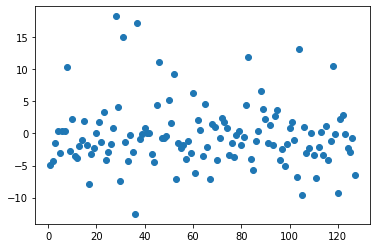

In [17]:
i=list(range(1,128))
j=y_test.reshape(-1,1)-y_predict
plt.scatter(i,j)